In [1]:
import numpy as np
import os
import random


import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import PIL.Image
from read_HiC import name_chromosomes
import seaborn as sns
from scipy.signal import find_peaks
from scipy.signal import savgol_filter

import sys
path=r'C:\Users\31649\Documents\genome analysis\genome_topology\functions'
sys.path.append(path)

from plotting_tools import set_layout
from genome_topology import normalize_psc
from genome_topology import get_matrix
from genome_topology import fractal_dimension
from genome_topology import make_graph
from plotting_tools import save_figures
from matrix_analysis import PlotMatrix_SelectFraction
from matrix_analysis import Select_entangled_fraction
from statistical_analysis import comparison_distributions
from statistical_analysis import find_peaks_distribution

In [170]:
resolution = '160'
path_data = f'results/cumulative/{resolution}/30'
increment_setting = path_data[-2:]

cutoff = '0.99'
samples = ['Control1', 'Control2', 'Treated1', 'Treated2']
chrom = 'X'

control1 = pd.DataFrame()
control2 = pd.DataFrame()
treated1 = pd.DataFrame()
treated2 = pd.DataFrame()

frames = [None]*4

for ind, sample in enumerate(samples):
    df =  pd.read_feather(f'{path_data}/cumulative_{sample}_{chrom}_{resolution}_{cutoff}.feather')
    
    
    frames[ind] = df.dropna().reset_index(drop=True)
    sample_col = [sample]* len(frames[ind])
    frames[ind]['Sample'] = sample_col

In [171]:
control1 = frames[0]
control2 = frames[1]
treated1 = frames[2]
treated2 = frames[3]

In [172]:
increment_setting

'30'

In [173]:
dfs = [control1, control2, treated1, treated2]
df = pd.concat(dfs)

In [174]:

set_layout(18, 18, 18)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


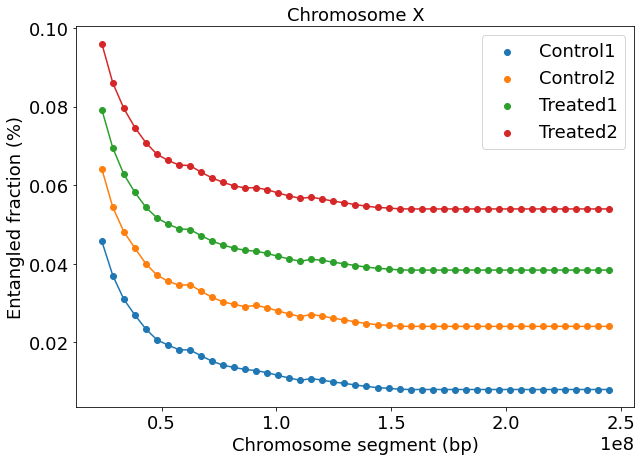

In [175]:
path_figure = 'results/figures/160/cumulative'
increment = 0
plot = plt.figure(figsize = (10, 7))

for sample in samples:
    df_sample = df[df['Sample'] == sample]
    x = df_sample['Cut-off']
    y = df_sample['Parallel (%)']
    
    y = y + increment
    
    plt.title(f'Chromosome {chrom}')
    plt.scatter(x, y, label = sample)
    plt.plot(x, y)
    plt.ylabel('Entangled fraction (%)')
    plt.xlabel('Chromosome segment (bp)')
    
    increment = increment + 0.015
    
plt.legend(bbox_to_anchor=(1, 1))     


save_figures(plot, path = path_figure, name_file = f'{chrom}', method= increment_setting)

In [176]:
plot_fig = 1
save_fig = 0

lol
lol
lol
lol


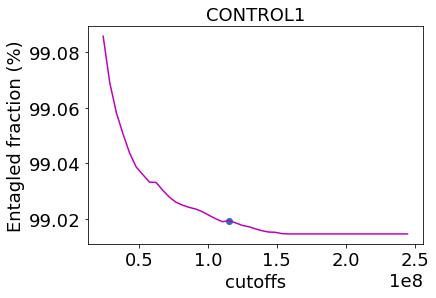

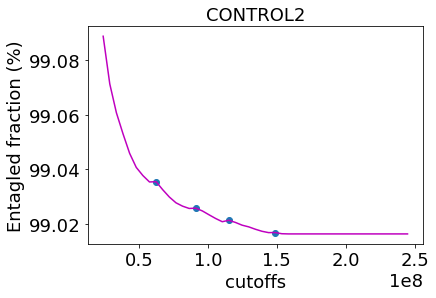

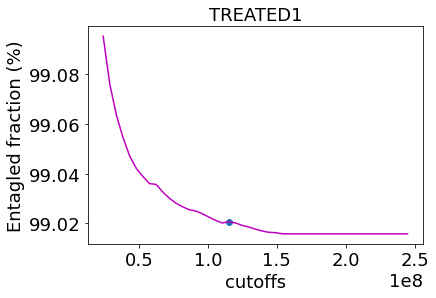

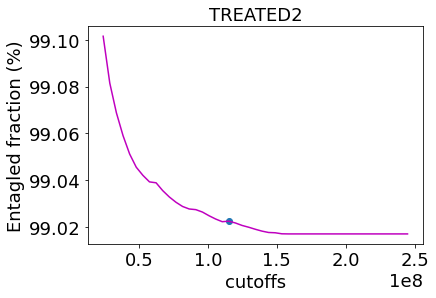

In [177]:
save_fig= False
plot_fig= 1
window=3
polynomial=2

distance_allchr=[]
sel_threshold=0
sel_prominence=0.00001



for sample in samples:
    df_sample = df[df['Sample'] == sample]

    atoms=np.array(df_sample['Cut-off'])
    series=np.array(df_sample['Series (%)'])
    filt_series=savgol_filter(series, window,polynomial)
    fract_ent=np.copy(100-filt_series)
    #fract_ent = 100 - series
    peak= find_peaks(fract_ent, threshold=sel_threshold, prominence=sel_prominence)
    array=np.array(peak[0])
    
    #dist=np.zeros(len(array)-1)
    #for m in range(len(dist)):
    #    dist[m]=atoms[array[m+1]]-atoms[array[m]]
        
    #for j in range(len(dist)):
    #    distance_allchr.append(dist[j])    
       
    if plot_fig:
        print('lol')
        #letter=chr_vec[t][-1:]
        fig = plt.figure()
        plt.plot(atoms, fract_ent, color='m', label='Filtered entangled fraction')
        plt.scatter(atoms[array],fract_ent[array], label='Local maxima')
        #string_title='Chromosome {}'.format(letter)
        string_title = f'{sample}'
        plt.title(string_title.upper())
        plt.xlabel('cutoffs')
        plt.ylabel('Entagled fraction (%)')    
        #plt.xlim(20,atoms[len(atoms)-1])
        #plt.legend()
        
        if save_fig:
            save_figures(fig,path_results, name_file = 'Chromosome {}'.format(letter))


In [92]:
distance_allchr

[51200000.0,
 51200000.0,
 51200000.0,
 51200000.0,
 51200000.0,
 51200000.0,
 51200000.0]

In [63]:
array

array([], dtype=int64)

In [49]:
atoms[array[1]]

30400000

In [47]:
array


array([ 37,  73, 109], dtype=int64)

In [61]:
df['Cut-off']


0      24000000
1      30400000
2      36800000
3      43200000
4      49600000
        ...    
31    222400000
32    228800000
33    235200000
34    241600000
35    248000000
Name: Cut-off, Length: 144, dtype: int32

In [54]:
cutoffs

NameError: name 'cutoffs' is not defined

In [96]:
data = pd.read_feather('results counts/cumulative/cumulative_Control2_1_160_0.95.feather')
par = data['Parallel (%)']
cut = data['Cut-off']

plt.scatter(cut, par)

FileNotFoundError: [Errno 2] No such file or directory: 'results counts/cumulative/cumulative_Control2_1_160_0.95.feather'